In [139]:
%cd "~/moses-incons-pen-xp"
%load_ext autoreload
%autoreload 2

/home/xabush/moses-incons-pen-xp
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from utils import *
from dataset_utils import *
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import stat

In [3]:
seeds = []

with open("seeds.txt", "r") as fp:
    for line in fp:
        seeds.append(int(line))

print(seeds)

[9815, 3435, 4524, 9745, 1668, 9549, 7608, 6448, 9616, 32, 2763, 60, 6589, 1471, 6699, 9204, 2226, 3680, 2885, 7352, 9255, 2213, 2235, 3531, 2512, 7359, 1468, 457, 1672, 3982, 4409, 3542, 4226, 8640, 2741, 8476, 6291, 1754, 2347, 2853]


- Load the results of the 5 experiments using 40 d/t random seeds:

    1. No inconsistency penalty (cr = 3)
    - Inconsistency penalty (cr = 3)
    - No inconsistency penalty (cr = 6)
    - Inconsistency penalty with diversity pressure (div-pressure = 0.7, cr=3)
    - No Inconsistency penalty with diversity pressure (div-pressure = 0.7, cr=3)




In [4]:
exps = ["exp_1_no_pen", "exp_2_pen", "exp_3_no_pen_c6", "exp_4_pen_div", "exp_5_no_pen_div"]

seed_exp = {}

for seed in seeds:
    seed_exp[seed] = []
    for exp in exps:
        seed_path = os.path.join("data/exps", f"{exp}/seed_{seed}")
        model_path = os.path.join(seed_path, "combo_models.csv")
        df = pd.read_csv(model_path)
        seed_exp[seed].append(df)

Compare experiment 1 (no pen) and experiment 2 (pen)

- Do normality test
- if both scores normally distributed used Paired t-test, otherwise use Wilcoxon ranked test
- Reject or Accept the null hypothesis (H0) - there is no difference between the mean/median of the two sets of scores

In [6]:
alpha = 0.05

In [121]:
exp1 = {}
exp2 = {}
exp3 = {}
exp4 = {}
exp5 = {}

for s in seed_exp:
   exp1[s] = seed_exp[s][0]
   exp2[s] = seed_exp[s][1]
   exp3[s] = seed_exp[s][2]
   exp4[s] = seed_exp[s][3]
   exp5[s] = seed_exp[s][4]

Check Balanced accuracy score

In [140]:
df_balanced_acc = do_stat_test(exp1, exp2, "balanced_acc")
df_balanced_acc[0]


=========================== balanced_acc_train ===============================

Two tailed test - 157/160 [98.125%] results are significant, (p_value < 0.05)
exp1 < exp2 - 81/160 [50.625%] results are significant, (p_value < 0.05)
exp1 > exp2 - 77/160 [48.125%] results are significant, (p_value < 0.05)

=========================== balanced_acc_test ===============================

Two tailed test - 158/160 [98.75%] results are significant, (p_value < 0.05)
exp1 < exp2 - 78/160 [48.75%] results are significant, (p_value < 0.05)
exp1 > exp2 - 80/160 [50.0%] results are significant, (p_value < 0.05)


,seed,fold,normal,test_statistic,p_value
0,9815,0,Yes,64.215882,1.597310e-134
1,9815,1,Yes,123.840732,1.538740e-189
2,9815,2,Yes,-35.047307,7.721905e-87
3,9815,3,Yes,-80.666116,2.068874e-153
4,3435,0,Yes,-3.637266,3.514055e-04
...,...,...,...,...,...
155,2347,3,Yes,-6.997967,3.925003e-11
156,2853,0,No,0.000000,2.215728e-18
157,2853,1,Yes,118.802702,5.144326e-186
158,2853,2,Yes,-26.874370,5.611830e-68


Check precision score

In [142]:
df_precision = do_stat_test(exp1, exp2, "precision")


=========================== precision_train ===============================

Two tailed test - 156/160 [97.5%] results are significant, (p_value < 0.05)
exp1 < exp2 - 81/160 [50.625%] results are significant, (p_value < 0.05)
exp1 > exp2 - 77/160 [48.125%] results are significant, (p_value < 0.05)

=========================== precision_test ===============================

Two tailed test - 156/160 [97.5%] results are significant, (p_value < 0.05)
exp1 < exp2 - 79/160 [49.375%] results are significant, (p_value < 0.05)
exp1 > exp2 - 78/160 [48.75%] results are significant, (p_value < 0.05)


Check model complexity

In [143]:
df_model_comp = do_stat_test(exp1, exp2, "complexity")


=========================== complexity ===============================

Two tailed test - 155/160 [96.875%] results are significant, (p_value < 0.05)
exp1 < exp2 - 107/160 [66.875%] results are significant, (p_value < 0.05)
exp1 > exp2 - 49/160 [30.625000000000004%] results are significant, (p_value < 0.05)


<AxesSubplot:ylabel='complexity'>

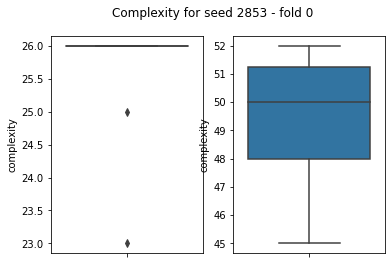

In [102]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.suptitle("Complexity for seed 2853 - fold 0")

fold_0_exp1 = exp1[2853][exp1[2853]["fold"] == 0]
fold_0_exp2 = exp2[2853][exp2[2853]["fold"] == 0]

sns.boxplot(data=fold_0_exp1, y="complexity", ax=ax1)
sns.boxplot(data=fold_0_exp2, y="complexity", ax=ax2)

Compare experiment 3 (Inconsistency pen - cr = 3) and experiment 2 (Non Inconsistency pen - cr = 6)

- Do normality test
- if both scores normally distributed used Paired t-test, otherwise use Wilcoxon ranked test
- Reject or Accept the null hypothesis (H0) - there is no difference between the mean/median of the two sets of scores

Check Balanced accuracy

In [146]:
df_balanced_acc = do_stat_test(exp3, exp2, "balanced_acc", name_1="exp3", name_2="exp2")


=========================== balanced_acc_train ===============================

Two tailed test - 154/160 [96.25%] results are significant, (p_value < 0.05)
exp3 < exp2 - 84/160 [52.5%] results are significant, (p_value < 0.05)
exp3 > exp2 - 72/160 [45.0%] results are significant, (p_value < 0.05)

=========================== balanced_acc_test ===============================

Two tailed test - 156/160 [97.5%] results are significant, (p_value < 0.05)
exp3 < exp2 - 83/160 [51.87500000000001%] results are significant, (p_value < 0.05)
exp3 > exp2 - 73/160 [45.625%] results are significant, (p_value < 0.05)


Check precision on validation set

In [147]:
df_precison = do_stat_test(exp3, exp2, "precision", name_1="exp3", name_2="exp2")


=========================== precision_train ===============================

Two tailed test - 158/160 [98.75%] results are significant, (p_value < 0.05)
exp3 < exp2 - 86/160 [53.75%] results are significant, (p_value < 0.05)
exp3 > exp2 - 74/160 [46.25%] results are significant, (p_value < 0.05)

=========================== precision_test ===============================

Two tailed test - 159/160 [99.375%] results are significant, (p_value < 0.05)
exp3 < exp2 - 82/160 [51.24999999999999%] results are significant, (p_value < 0.05)
exp3 > exp2 - 77/160 [48.125%] results are significant, (p_value < 0.05)


Check model complexity

In [148]:
df_complexity = do_stat_test(exp3, exp2, "complexity", name_1="exp3", name_2="exp2")


=========================== complexity ===============================

Two tailed test - 158/160 [98.75%] results are significant, (p_value < 0.05)
exp3 < exp2 - 78/160 [48.75%] results are significant, (p_value < 0.05)
exp3 > exp2 - 80/160 [50.0%] results are significant, (p_value < 0.05)


<AxesSubplot:ylabel='complexity'>

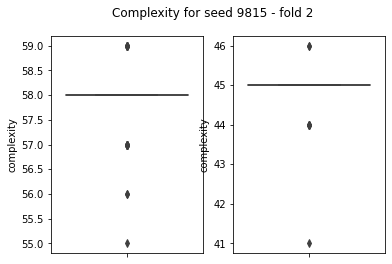

In [119]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.suptitle("Complexity for seed 9815 - fold 2")

fold_0_exp3 = exp3[9815][exp3[9815]["fold"] == 2]
fold_0_exp2 = exp2[9815][exp2[9815]["fold"] == 2]

sns.boxplot(data=fold_0_exp3, y="complexity", ax=ax1)
sns.boxplot(data=fold_0_exp2, y="complexity", ax=ax2)

Compare experiment 4 (Inconsistency pen with div pressure (div-pressure = 0.7, cr=3)) and experiment 5 (No incons pen div-pressure = 0.7, cr=3)

- Do normality test
- if both scores normally distributed used Paired t-test, otherwise use Wilcoxon ranked test
- Reject or Accept the null hypothesis (H0) - there is no difference between the mean/median of the two sets of scores

Check Balanced accuracy score

In [149]:
df_acc = do_stat_test(exp4, exp5, "balanced_acc", name_1="exp4", name_2="exp5")


=========================== balanced_acc_train ===============================

Two tailed test - 146/160 [91.25%] results are significant, (p_value < 0.05)
exp4 < exp5 - 83/160 [51.87500000000001%] results are significant, (p_value < 0.05)
exp4 > exp5 - 68/160 [42.5%] results are significant, (p_value < 0.05)

=========================== balanced_acc_test ===============================

Two tailed test - 147/160 [91.875%] results are significant, (p_value < 0.05)
exp4 < exp5 - 76/160 [47.5%] results are significant, (p_value < 0.05)
exp4 > exp5 - 74/160 [46.25%] results are significant, (p_value < 0.05)


Check precision score

In [150]:
#Two tailed test
df_precison = do_stat_test(exp4, exp5, "precision", name_1="exp4", name_2="exp5")


=========================== precision_train ===============================

Two tailed test - 145/160 [90.625%] results are significant, (p_value < 0.05)
exp4 < exp5 - 80/160 [50.0%] results are significant, (p_value < 0.05)
exp4 > exp5 - 70/160 [43.75%] results are significant, (p_value < 0.05)

=========================== precision_test ===============================

Two tailed test - 144/160 [90.0%] results are significant, (p_value < 0.05)
exp4 < exp5 - 74/160 [46.25%] results are significant, (p_value < 0.05)
exp4 > exp5 - 74/160 [46.25%] results are significant, (p_value < 0.05)


Check model complexity

In [151]:
df_comp = do_stat_test(exp4, exp5, "complexity", name_1="exp4", name_2="exp5")


=========================== complexity ===============================

Two tailed test - 121/160 [75.625%] results are significant, (p_value < 0.05)
exp4 < exp5 - 31/160 [19.375%] results are significant, (p_value < 0.05)
exp4 > exp5 - 97/160 [60.62499999999999%] results are significant, (p_value < 0.05)


In [138]:
#One tailed test, i.e exp5 < exp4
df = do_stat_test(exp5, exp4, "complexity", alt="less")
df

97/160 [60.62499999999999%] results are significant, i.e p_value < 0.05


,seed,fold,normal,test_statistic,p_value
0,9815,0,Yes,-0.924107,1.782834e-01
1,9815,1,Yes,2.006302,9.769007e-01
2,9815,2,Yes,-8.789656,3.802673e-16
3,9815,3,Yes,-4.990182,6.636370e-07
4,3435,0,Yes,-0.193662,4.233204e-01
...,...,...,...,...,...
155,2347,3,Yes,0.698714,7.572204e-01
156,2853,0,Yes,-7.855011,1.287105e-13
157,2853,1,Yes,-0.795000,2.137875e-01
158,2853,2,Yes,7.714100,1.000000e+00
